In [76]:
import pandas as pd

train_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
test_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'sex',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'
]

train_df = pd.read_csv(train_url, header=None, names=columns, na_values=' ?')
test_df = pd.read_csv(test_url, header=0, names=columns, na_values=' ?')

missing_train = train_df.isna().sum().to_frame('MissingCount')
missing_train['MissingRate'] = missing_train['MissingCount'] / len(train_df) * 100

missing_test = test_df.isna().sum().to_frame('MissingCount')
missing_test['MissingRate'] = missing_test['MissingCount'] / len(test_df) * 100

print("Training set missing values:")
print(missing_train)

print("\nTest set missing values:")
print(missing_test)

print("\nSample of training data:")
print(train_df.head())

print("\nSample of test data:")
print(test_df.head())

Training set missing values:
                MissingCount  MissingRate
age                        0     0.000000
workclass               1836     5.638647
fnlwgt                     0     0.000000
education                  0     0.000000
education_num              0     0.000000
marital_status             0     0.000000
occupation              1843     5.660146
relationship               0     0.000000
race                       0     0.000000
sex                        0     0.000000
capital_gain               0     0.000000
capital_loss               0     0.000000
hours_per_week             0     0.000000
native_country           583     1.790486
income                     0     0.000000

Test set missing values:
                MissingCount  MissingRate
age                        0     0.000000
workclass                963     5.914870
fnlwgt                     0     0.000000
education                  0     0.000000
education_num              0     0.000000
marital_status       

In [77]:
print("Before dropping missing values:")
print("Training set samples:", len(train_df))
print("Test set samples:", len(test_df))

train_df = train_df.dropna()
test_df = test_df.dropna()

print("\nAfter dropping missing values:")
print("Training set samples:", len(train_df))
print("Test set samples:", len(test_df))

Before dropping missing values:
Training set samples: 32561
Test set samples: 16281

After dropping missing values:
Training set samples: 30162
Test set samples: 15060


In [78]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

#删除fnlwgt
train_df = train_df.drop(columns=['fnlwgt'], errors='ignore')
test_df = test_df.drop(columns=['fnlwgt'], errors='ignore')

#分类
nominal_features = ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
ordinal_features = ['education']
#interval_features = ['education_num']
# ratio_features = ['capital_gain', 'capital_loss', 'hours_per_week']  # 不归一化

In [79]:
import pandas as pd

print(train_df['income'].value_counts())
print(test_df['income'].value_counts())

income
<=50K    22654
>50K      7508
Name: count, dtype: int64
income
<=50K.    11360
>50K.      3700
Name: count, dtype: int64


In [80]:
#标称
le_dict = {}
for col in nominal_features:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col].astype(str))
    test_df[col] = le.transform(test_df[col].astype(str))
    le_dict[col] = le

#education
education_order = [
    'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
    'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors',
    'Masters', 'Prof-school', 'Doctorate'
]
edu_map = {edu: i for i, edu in enumerate(education_order)}

train_df['education'] = train_df['education'].astype(str).str.strip()
test_df['education'] = test_df['education'].astype(str).str.strip()

train_df['education'] = train_df['education'].map(edu_map)
test_df['education'] = test_df['education'].map(edu_map)


#education_num
# scaler = StandardScaler()
# train_df['education_num'] = scaler.fit_transform(train_df[['education_num']])
# test_df['education_num'] = scaler.transform(test_df[['education_num']])


#income
train_df['income'] = train_df['income'].astype(str).str.strip().str.replace('.', '', regex=False)
test_df['income'] = test_df['income'].astype(str).str.strip().str.replace('.', '', regex=False)

income_map = {'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1}
train_df['income'] = train_df['income'].map(income_map)
test_df['income'] = test_df['income'].map(income_map)

print("\nSample of preprocessed training data:")
print(train_df.head())

print("\nSample of preprocessed test data:")
print(test_df.head())



Sample of preprocessed training data:
   age  workclass  education  education_num  marital_status  occupation  \
0   39          5         12             13               4           0   
1   50          4         12             13               2           3   
2   38          2          8              9               0           5   
3   53          2          6              7               2           5   
4   28          2         12             13               2           9   

   relationship  race  sex  capital_gain  capital_loss  hours_per_week  \
0             1     4    1          2174             0              40   
1             0     4    1             0             0              13   
2             1     4    1             0             0              40   
3             0     2    1             0             0              40   
4             5     2    0             0             0              40   

   native_country  income  
0              38       0  
1        

In [81]:
trd=train_df
ted=test_df

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train = train_df.drop(columns=['income'])
y_train = train_df['income']
X_test = test_df.drop(columns=['income'])
y_test = test_df['income']

In [83]:
def evaluate(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1_score': f1_score(y_true, y_pred)
    }

In [150]:
import pandas as pd
import numpy as np
from chefboost import Chefboost as chef
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
from sklearn.tree import DecisionTreeClassifier

# 假定 train_df, test_df 已预处理好
inv_map = {0: '<=50K', 1: '>50K'}
train_for_chef = train_df.copy()
test_for_chef  = test_df.copy()
if set(train_df['income'].unique()).issubset({0,1}):
    train_for_chef['income'] = train_for_chef['income'].map(inv_map)
    test_for_chef['income']  = test_for_chef['income'].map(inv_map)

train_for_chef = train_for_chef.rename(columns={'income':'Decision'})
test_for_chef  = test_for_chef.rename(columns={'income':'Decision'})

feature_cols = [c for c in train_for_chef.columns if c != 'Decision']
is_numeric_col = {c: train_for_chef[c].dtype.kind in 'iufc' for c in feature_cols}

def row_to_obj(row):
    obj = []
    for c in feature_cols:
        v = row[c]
        if pd.isna(v):
            obj.append(0 if is_numeric_col[c] else "")
        else:
            obj.append(float(v) if is_numeric_col[c] else str(v))
    return obj

def evaluate_string_preds(y_true_strings, y_pred_strings, positive_label='>50K'):
    y_true = [1 if y==positive_label else 0 for y in y_true_strings]
    y_pred = [1 if y==positive_label else 0 for y in y_pred_strings]
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='weighted', zero_division=0),
        'recall': recall_score(y_true, y_pred, average='weighted', zero_division=0),
        'f1_score': f1_score(y_true, y_pred, average='weighted', zero_division=0)    
    }

#ID3
start_time = time.time()
config_id3 = {'algorithm':'ID3'}
model_id3 = chef.fit(train_for_chef, config_id3)
train_time_id3 = time.time() - start_time

start_time = time.time()
preds_id3 = [chef.predict(model_id3, row_to_obj(row)) for _, row in test_for_chef.iterrows()]
predict_time_id3 = time.time() - start_time

perf_id3 = evaluate_string_preds(test_for_chef['Decision'].tolist(), preds_id3)
print("ID3 performance:", perf_id3)
print(f"Training time: {train_time_id3:.2f}s, Prediction time: {predict_time_id3:.2f}s\n")

#C4.5
start_time = time.time()
config_c45 = {'algorithm':'C4.5'}
model_c45 = chef.fit(train_for_chef, config_c45, target_label='Decision', validation_df=test_for_chef)
train_time_c45 = time.time() - start_time

start_time = time.time()
preds_c45 = [chef.predict(model_c45, row_to_obj(row)) for _, row in test_for_chef.iterrows()]
predict_time_c45 = time.time() - start_time

perf_c45 = evaluate_string_preds(test_for_chef['Decision'].tolist(), preds_c45)
print("C4.5 performance:", perf_c45)
print(f"Training time: {train_time_c45:.2f}s, Prediction time: {predict_time_c45:.2f}s\n")

25-10-02 14:33:55 - ID3 tree is going to be built...
25-10-02 14:34:17 - -------------------------
25-10-02 14:34:17 - finished in 22.25956702232361 seconds
25-10-02 14:34:20 - -------------------------
25-10-02 14:34:20 - Evaluate train set
25-10-02 14:34:20 - -------------------------
25-10-02 14:34:20 - Accuracy: 83.55878257409987% on 30162 instances
25-10-02 14:34:20 - Labels: ['<=50K' '>50K']
25-10-02 14:34:20 - Confusion matrix: [[21702, 4007], [952, 3501]]
25-10-02 14:34:20 - Precision: 84.414%, Recall: 95.7977%, F1: 89.7463%
ID3 performance: {'accuracy': 0.8327357237715803, 'precision': 0.8254038424844506, 'recall': 0.8327357237715803, 'f1_score': 0.8164047606952514}
Training time: 25.33s, Prediction time: 1.28s

25-10-02 14:34:22 - C4.5 tree is going to be built...
25-10-02 14:34:38 - -------------------------
25-10-02 14:34:38 - finished in 16.692408323287964 seconds
25-10-02 14:34:41 - -------------------------
25-10-02 14:34:41 - Evaluate train set
25-10-02 14:34:41 - -----

In [148]:
# 训练 CART(gini)
X_train = train_df.drop(columns=['income'])
y_train = train_df['income']
X_test = test_df.drop(columns=['income'])
y_test = test_df['income']

start_time = time.time()
dt_gini = DecisionTreeClassifier(criterion='gini',random_state=42)
dt_gini.fit(X_train, y_train)
train_time_gini = time.time() - start_time

start_time = time.time()
y_pred_gini = dt_gini.predict(X_test)
predict_time_gini = time.time() - start_time

perf_gini = {
    "accuracy": accuracy_score(y_test, y_pred_gini),
    "precision_weighted": precision_score(y_test, y_pred_gini, average='weighted'),
    "recall_weighted": recall_score(y_test, y_pred_gini, average='weighted'),
    "f1_weighted": f1_score(y_test, y_pred_gini, average='weighted')
}
print("CART (gini) performance:", perf_gini)
print(f"Training time: {train_time_gini:.2f}s, Prediction time: {predict_time_gini:.2f}s\n")

CART (gini) performance: {'accuracy': 0.8089641434262949, 'precision_weighted': 0.8080194358295982, 'recall_weighted': 0.8089641434262949, 'f1_weighted': 0.8084795658380065}
Training time: 0.08s, Prediction time: 0.00s



In [147]:
# 训练 CART(entropy)
start_time = time.time()
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)
train_time_entropy = time.time() - start_time

start_time = time.time()
y_pred_entropy = dt_entropy.predict(X_test)
predict_time_entropy = time.time() - start_time

perf_entropy = { 
    "accuracy": accuracy_score(y_test, y_pred_entropy),
    "precision_weighted": precision_score(y_test, y_pred_entropy, average='weighted'),
    "recall_weighted": recall_score(y_test, y_pred_entropy, average='weighted'),
    "f1_weighted": f1_score(y_test, y_pred_entropy, average='weighted')
}
print("ID3-like (entropy) performance:", perf_entropy)
print(f"Training time: {train_time_entropy:.2f}s, Prediction time: {predict_time_entropy:.2f}s\n")


ID3-like (entropy) performance: {'accuracy': 0.8140770252324038, 'precision_weighted': 0.8122990123347794, 'recall_weighted': 0.8140770252324038, 'f1_weighted': 0.8131399995206064}
Training time: 0.10s, Prediction time: 0.01s



In [164]:
#entropy grid
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [5,6,7, 8,9, 10, 11,12],
    'min_samples_split': [2, 10, 20, 30],
    'min_samples_leaf': [1, 5, 10, 20,30,40,50,60,70,80,90,100],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

dt_entropy = DecisionTreeClassifier(criterion='entropy',class_weight='balanced', random_state=42)

grid_search = GridSearchCV(
    dt_entropy,
    param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best params:", grid_search.best_params_)
print("Best CV F1-score:", grid_search.best_score_)
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

perf = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred, average='weighted'),
    "recall": recall_score(y_test, y_pred, average='weighted'),
    "f1_score": f1_score(y_test, y_pred, average='weighted')
}

print("Performance on test set with best parameters:", perf)

# 如果你想要详细的分类报告（含每个类别的指标）
print("\nDetailed classification report:")
print(classification_report(y_test, y_pred, target_names=["<=50K", ">50K"]))


Best params: {'class_weight': 'balanced', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 20, 'min_samples_split': 2}
Best CV F1-score: 0.6822396603445443
Performance on test set with best parameters: {'accuracy': 0.8075697211155378, 'precision': 0.8419885889696928, 'recall': 0.8075697211155378, 'f1_score': 0.8168929489828757}

Detailed classification report:
              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.86     11360
        >50K       0.58      0.81      0.67      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.81      0.77     15060
weighted avg       0.84      0.81      0.82     15060



In [180]:
#entropy random
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import time
import numpy as np

X_train = train_df.drop(columns=['income'])
y_train = train_df['income']
X_test  = test_df.drop(columns=['income'])
y_test  = test_df['income']

#RandomizedSearch
from scipy.stats import randint

param_dist = {
    'max_depth': [None] + list(range(4, 21)),
    'min_samples_split': randint(2, 50),
    'min_samples_leaf': randint(1, 20),
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

rnd = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(criterion='entropy',class_weight='balanced', random_state=42),
    param_distributions=param_dist,
    n_iter=60,     
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

t0 = time.time()
rnd.fit(X_train, y_train)
t1 = time.time()
print(f"RandomizedSearch done in {(t1-t0):.1f} seconds")
print("Best params (RandomizedSearch):", rnd.best_params_)
print("Best CV score (F1):", rnd.best_score_)

best_dt_rnd = rnd.best_estimator_
y_pred_rnd = best_dt_rnd.predict(X_test)
print("Test set performance (RandomizedSearch best):")
print({
    'accuracy': accuracy_score(y_test, y_pred_rnd),
    'precision': precision_score(y_test, y_pred_rnd),
    'recall': recall_score(y_test, y_pred_rnd),
    'f1_score': f1_score(y_test, y_pred_rnd)
})
print("\nClassification report:\n", classification_report(y_test, y_pred_rnd))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
RandomizedSearch done in 6.4 seconds
Best params (RandomizedSearch): {'class_weight': None, 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 40}
Best CV score (F1): 0.6814380412746374
Test set performance (RandomizedSearch best):
{'accuracy': 0.8479415670650731, 'precision': 0.7269800386349002, 'recall': 0.6102702702702703, 'f1_score': 0.6635321774904496}

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90     11360
           1       0.73      0.61      0.66      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060



In [177]:
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

t0 = time.time()
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
train_time = time.time() - t0

t1 = time.time()
y_pred_nb = nb_model.predict(X_test_scaled)
predict_time = time.time() - t1

nb_perf = {
    'accuracy': accuracy_score(y_test, y_pred_nb),
    'precision': precision_score(y_test, y_pred_nb, average='weighted'),
    'recall': recall_score(y_test, y_pred_nb, average='weighted'),
    'f1_score': f1_score(y_test, y_pred_nb, average='weighted')
}

print("Naive Bayes Performance:", nb_perf)
print(f"Training time: {train_time:.2f}s, Prediction time: {predict_time:.2f}s")

print("\nDetailed classification report:\n")
print(classification_report(y_test, y_pred_nb, target_names=['<=50K', '>50K']))


Naive Bayes Performance: {'accuracy': 0.8092297476759628, 'precision': 0.7950857632300953, 'recall': 0.8092297476759628, 'f1_score': 0.7908701244814546}
Training time: 0.01s, Prediction time: 0.00s

Detailed classification report:

              precision    recall  f1-score   support

       <=50K       0.83      0.94      0.88     11360
        >50K       0.69      0.41      0.51      3700

    accuracy                           0.81     15060
   macro avg       0.76      0.67      0.70     15060
weighted avg       0.80      0.81      0.79     15060



In [174]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, f1_score
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gnb = GaussianNB()

# 网格搜索
param_grid = {
    'var_smoothing': np.logspace(-12, -6, 7) 
}

grid_search = GridSearchCV(
    estimator=gnb,
    param_grid=param_grid,
    scoring=make_scorer(f1_score, average='weighted'), 
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_scaled, y_train)
print("Best params (GridSearch):", grid_search.best_params_)
print("Best CV F1-score:", grid_search.best_score_)

best_gnb = grid_search.best_estimator_

# 测试集评估
y_pred_gnb = best_gnb.predict(X_test_scaled)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
nb_perf = {
    'accuracy': accuracy_score(y_test, y_pred_gnb),
    'precision': precision_score(y_test, y_pred_gnb, average='weighted'),
    'recall': recall_score(y_test, y_pred_gnb, average='weighted'),
    'f1_score': f1_score(y_test, y_pred_gnb, average='weighted')
}
print("Test set performance with best parameters:", nb_perf)
print("\nDetailed classification report:\n", classification_report(y_test, y_pred_gnb, target_names=['<=50K', '>50K']))

# 随机搜索
from scipy.stats import uniform

param_dist = {'var_smoothing': uniform(loc=1e-12, scale=1e-6)} 

rnd_search = RandomizedSearchCV(
    estimator=gnb,
    param_distributions=param_dist,
    n_iter=30, 
    scoring=make_scorer(f1_score, average='weighted'),
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

rnd_search.fit(X_train_scaled, y_train)
print("Best params (RandomizedSearch):", rnd_search.best_params_)
print("Best CV F1-score:", rnd_search.best_score_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best params (GridSearch): {'var_smoothing': 1e-12}
Best CV F1-score: 0.7894100586857367
Test set performance with best parameters: {'accuracy': 0.8092297476759628, 'precision': 0.7950857632300953, 'recall': 0.8092297476759628, 'f1_score': 0.7908701244814546}

Detailed classification report:
               precision    recall  f1-score   support

       <=50K       0.83      0.94      0.88     11360
        >50K       0.69      0.41      0.51      3700

    accuracy                           0.81     15060
   macro avg       0.76      0.67      0.70     15060
weighted avg       0.80      0.81      0.79     15060

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params (RandomizedSearch): {'var_smoothing': 3.7454111884736244e-07}
Best CV F1-score: 0.7894100586857367


使用参数: {'class_weight': None, 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 40}

CART (entropy) performance (weighted): {'accuracy': 0.8479415670650731, 'precision_weighted': 0.8419309306347967, 'recall_weighted': 0.8479415670650731, 'f1_weighted': 0.8432431379063132}
Training time: 0.15s, Prediction time: 0.01s

Confusion matrix:
 [[10512   848]
 [ 1442  2258]]

Classification report:
               precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90     11360
        >50K       0.73      0.61      0.66      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060

ROC AUC: 0.8888  (roc_auc_score: 0.8888)


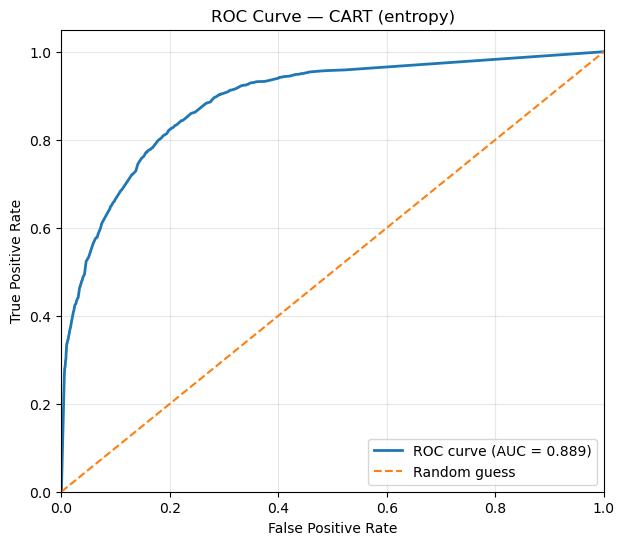

In [181]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, roc_auc_score, confusion_matrix, classification_report
)


params = {
    'class_weight': None,
    'max_depth': 15,
    'max_features': None,
    'min_samples_leaf': 3, 
    'min_samples_split': 40
}

def ensure_binary_series(y):
    y_s = pd.Series(y)
    if y_s.dtype.kind in 'iufc':  
        return y_s.astype(int)
    mapping = {}
    for v in y_s.unique():
        if isinstance(v, str) and '>' in v:
            mapping[v] = 1
        elif isinstance(v, str) and v.strip().startswith('>'):
            mapping[v] = 1
        else:
            mapping[v] = 0
    return y_s.map(mapping).astype(int)

y_train_bin = ensure_binary_series(y_train)
y_test_bin  = ensure_binary_series(y_test)

dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42, **params)

t0 = time.time()
dt_entropy.fit(X_train, y_train_bin)
train_time = time.time() - t0


t1 = time.time()
y_pred = dt_entropy.predict(X_test)
y_proba = dt_entropy.predict_proba(X_test)[:, 1]
predict_time = time.time() - t1


perf = {
    "accuracy": accuracy_score(y_test_bin, y_pred),
    "precision_weighted": precision_score(y_test_bin, y_pred, average='weighted', zero_division=0),
    "recall_weighted": recall_score(y_test_bin, y_pred, average='weighted', zero_division=0),
    "f1_weighted": f1_score(y_test_bin, y_pred, average='weighted', zero_division=0)
}

cm = confusion_matrix(y_test_bin, y_pred)
cls_report = classification_report(y_test_bin, y_pred, target_names=["<=50K", ">50K"], zero_division=0)

fpr, tpr, _ = roc_curve(y_test_bin, y_proba)
roc_auc = auc(fpr, tpr)
roc_auc_score_val = roc_auc_score(y_test_bin, y_proba)

print("使用参数:", params)
print("\nCART (entropy) performance (weighted):", perf)
print(f"Training time: {train_time:.2f}s, Prediction time: {predict_time:.2f}s")
print("\nConfusion matrix:\n", cm)
print("\nClassification report:\n", cls_report)
print(f"ROC AUC: {roc_auc:.4f}  (roc_auc_score: {roc_auc_score_val:.4f})")

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], linestyle='--', lw=1.5, label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — CART (entropy)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


GridSearch 最佳参数: {'var_smoothing': 1e-12}


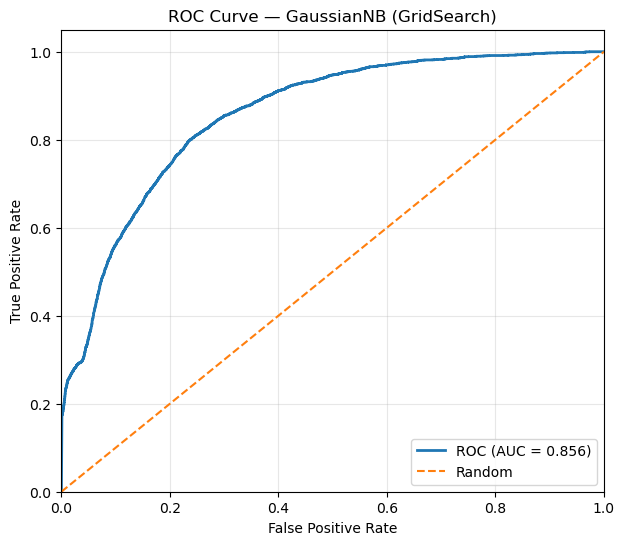

GridSearch Best model performance: {'accuracy': 0.8092297476759628, 'precision_weighted': 0.7950857632300953, 'recall_weighted': 0.8092297476759628, 'f1_weighted': 0.7908701244814546}
GridSearch AUC: 0.8565, Prediction time: 0.0072s

详细分类报告（GridSearch 最佳模型）：
              precision    recall  f1-score   support

       <=50K       0.83      0.94      0.88     11360
        >50K       0.69      0.41      0.51      3700

    accuracy                           0.81     15060
   macro avg       0.76      0.67      0.70     15060
weighted avg       0.80      0.81      0.79     15060

RandomizedSearch 最佳参数: {'var_smoothing': 3.7454111884736244e-07}


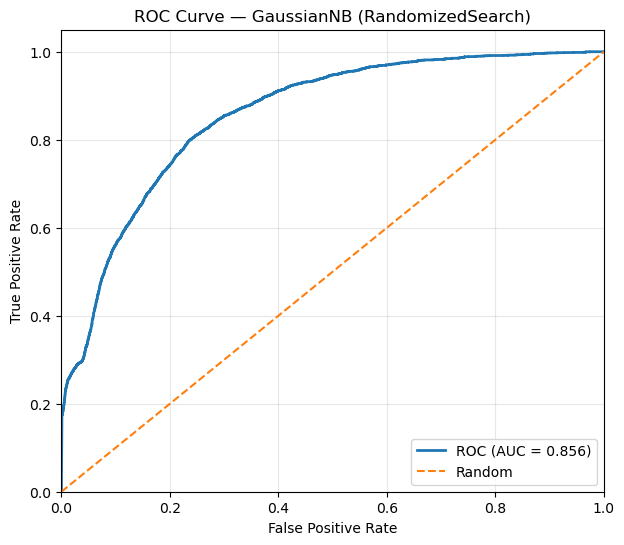

RandomizedSearch Best model performance: {'accuracy': 0.8092297476759628, 'precision_weighted': 0.7950857632300953, 'recall_weighted': 0.8092297476759628, 'f1_weighted': 0.7908701244814546}
RandomizedSearch AUC: 0.8565, Prediction time: 0.0101s

详细分类报告（RandomizedSearch 最佳模型）：
              precision    recall  f1-score   support

       <=50K       0.83      0.94      0.88     11360
        >50K       0.69      0.41      0.51      3700

    accuracy                           0.81     15060
   macro avg       0.76      0.67      0.70     15060
weighted avg       0.80      0.81      0.79     15060

汇总：
Grid AUC: 0.8565    Random AUC: 0.8565
Grid F1 (weighted): 0.7909    Random F1 (weighted): 0.7909


In [183]:
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    roc_curve, auc, roc_auc_score,
    accuracy_score, precision_score, recall_score, f1_score, classification_report
)
from sklearn.preprocessing import label_binarize

best_gnb_grid = grid_search.best_estimator_
best_gnb_rnd = rnd_search.best_estimator_

def to_binary(y):
    y_s = np.array(y)
    if y_s.dtype.kind in 'iufc':
        return y_s.astype(int)
    return np.array([1 if (isinstance(v, str) and ('>' in v or v.strip().startswith('>'))) else 0 for v in y_s])

y_test_bin = to_binary(y_test)

def eval_and_plot_roc(model, X_test, y_test_bin, title_suffix):

    t0 = time.time()
    y_proba = model.predict_proba(X_test)[:, 1]  
    pred_time = time.time() - t0

    y_pred = model.predict(X_test)

    perf = {
        'accuracy': accuracy_score(y_test_bin, y_pred),
        'precision_weighted': precision_score(y_test_bin, y_pred, average='weighted', zero_division=0),
        'recall_weighted': recall_score(y_test_bin, y_pred, average='weighted', zero_division=0),
        'f1_weighted': f1_score(y_test_bin, y_pred, average='weighted', zero_division=0)
    }

    # ROC / AUC
    fpr, tpr, _ = roc_curve(y_test_bin, y_proba)
    roc_auc = auc(fpr, tpr)
    roc_auc_sklearn = roc_auc_score(y_test_bin, y_proba)

    plt.figure(figsize=(7,6))
    plt.plot(fpr, tpr, lw=2, label=f'ROC (AUC = {roc_auc:.3f})')
    plt.plot([0,1], [0,1], linestyle='--', lw=1.5, label='Random')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve — {title_suffix}')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.show()

    return perf, roc_auc, pred_time

print("GridSearch 最佳参数:", grid_search.best_params_)
t_start = time.time()
grid_perf, grid_auc, grid_pred_time = eval_and_plot_roc(best_gnb_grid, X_test_scaled, y_test_bin, "GaussianNB (GridSearch)")
print("GridSearch Best model performance:", grid_perf)
print(f"GridSearch AUC: {grid_auc:.4f}, Prediction time: {grid_pred_time:.4f}s\n")
print("详细分类报告（GridSearch 最佳模型）：")
print(classification_report(y_test_bin, best_gnb_grid.predict(X_test_scaled), target_names=['<=50K','>50K'], zero_division=0))

print("RandomizedSearch 最佳参数:", rnd_search.best_params_)
rnd_perf, rnd_auc, rnd_pred_time = eval_and_plot_roc(best_gnb_rnd, X_test_scaled, y_test_bin, "GaussianNB (RandomizedSearch)")
print("RandomizedSearch Best model performance:", rnd_perf)
print(f"RandomizedSearch AUC: {rnd_auc:.4f}, Prediction time: {rnd_pred_time:.4f}s\n")
print("详细分类报告（RandomizedSearch 最佳模型）：")
print(classification_report(y_test_bin, best_gnb_rnd.predict(X_test_scaled), target_names=['<=50K','>50K'], zero_division=0))

print("汇总：")
print(f"Grid AUC: {grid_auc:.4f}    Random AUC: {rnd_auc:.4f}")
print(f"Grid F1 (weighted): {grid_perf['f1_weighted']:.4f}    Random F1 (weighted): {rnd_perf['f1_weighted']:.4f}")


GridSearch 最佳参数: {'var_smoothing': 1e-12}


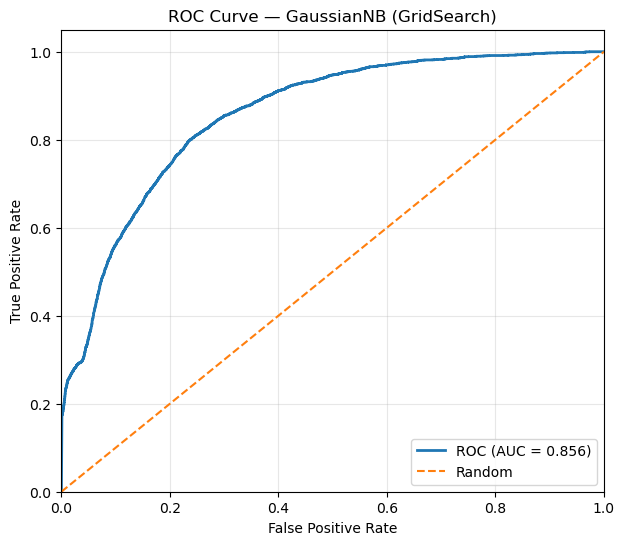

GridSearch Best model performance:
  accuracy: 0.809
  precision_weighted: 0.795
  recall_weighted: 0.809
  f1_weighted: 0.791
GridSearch AUC: 0.856, Prediction time: 0.025s

详细分类报告（GridSearch 最佳模型）：
              precision    recall  f1-score   support

       <=50K      0.830     0.940     0.881     11360
        >50K      0.688     0.409     0.513      3700

    accuracy                          0.809     15060
   macro avg      0.759     0.674     0.697     15060
weighted avg      0.795     0.809     0.791     15060

RandomizedSearch 最佳参数: {'var_smoothing': 3.7454111884736244e-07}


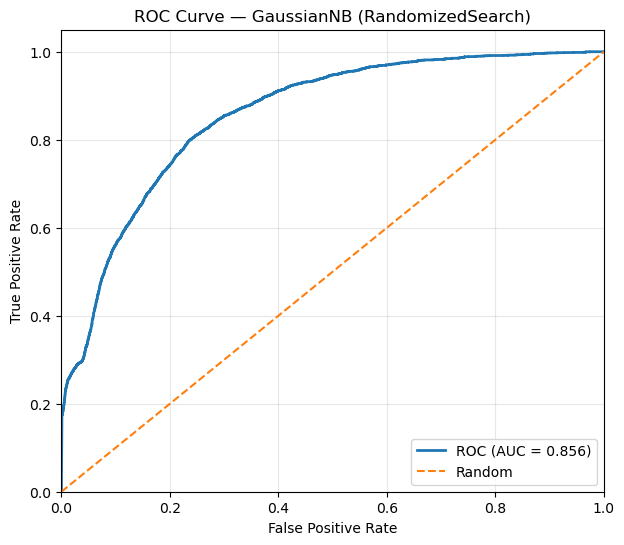

RandomizedSearch Best model performance:
  accuracy: 0.809
  precision_weighted: 0.795
  recall_weighted: 0.809
  f1_weighted: 0.791
RandomizedSearch AUC: 0.856, Prediction time: 0.012s

详细分类报告（RandomizedSearch 最佳模型）：
              precision    recall  f1-score   support

       <=50K      0.830     0.940     0.881     11360
        >50K      0.688     0.409     0.513      3700

    accuracy                          0.809     15060
   macro avg      0.759     0.674     0.697     15060
weighted avg      0.795     0.809     0.791     15060

汇总：
Grid AUC: 0.856    Random AUC: 0.856
Grid F1 (weighted): 0.791    Random F1 (weighted): 0.791


In [184]:
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    roc_curve, auc, roc_auc_score,
    accuracy_score, precision_score, recall_score, f1_score, classification_report
)
from sklearn.preprocessing import label_binarize

best_gnb_grid = grid_search.best_estimator_
best_gnb_rnd = rnd_search.best_estimator_

def to_binary(y):
    y_s = np.array(y)
    if y_s.dtype.kind in 'iufc':
        return y_s.astype(int)
    return np.array([1 if (isinstance(v, str) and ('>' in v or v.strip().startswith('>'))) else 0 for v in y_s])

y_test_bin = to_binary(y_test)

def eval_and_plot_roc(model, X_test, y_test_bin, title_suffix):
    t0 = time.time()
    y_proba = model.predict_proba(X_test)[:, 1]  
    pred_time = time.time() - t0

    y_pred = model.predict(X_test)

    perf = {
        'accuracy': accuracy_score(y_test_bin, y_pred),
        'precision_weighted': precision_score(y_test_bin, y_pred, average='weighted', zero_division=0),
        'recall_weighted': recall_score(y_test_bin, y_pred, average='weighted', zero_division=0),
        'f1_weighted': f1_score(y_test_bin, y_pred, average='weighted', zero_division=0)
    }

    # ROC / AUC
    fpr, tpr, _ = roc_curve(y_test_bin, y_proba)
    roc_auc = auc(fpr, tpr)

    # 绘制 ROC 曲线
    plt.figure(figsize=(7,6))
    plt.plot(fpr, tpr, lw=2, label=f'ROC (AUC = {roc_auc:.3f})')
    plt.plot([0,1], [0,1], linestyle='--', lw=1.5, label='Random')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve — {title_suffix}')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.show()

    return perf, roc_auc, pred_time

# ---------- GridSearch ----------
print("GridSearch 最佳参数:", grid_search.best_params_)
grid_perf, grid_auc, grid_pred_time = eval_and_plot_roc(best_gnb_grid, X_test_scaled, y_test_bin, "GaussianNB (GridSearch)")
print("GridSearch Best model performance:")
for k, v in grid_perf.items():
    print(f"  {k}: {v:.3f}")
print(f"GridSearch AUC: {grid_auc:.3f}, Prediction time: {grid_pred_time:.3f}s\n")
print("详细分类报告（GridSearch 最佳模型）：")
print(classification_report(y_test_bin, best_gnb_grid.predict(X_test_scaled), target_names=['<=50K','>50K'], zero_division=0, digits=3))

# ---------- RandomizedSearch ----------
print("RandomizedSearch 最佳参数:", rnd_search.best_params_)
rnd_perf, rnd_auc, rnd_pred_time = eval_and_plot_roc(best_gnb_rnd, X_test_scaled, y_test_bin, "GaussianNB (RandomizedSearch)")
print("RandomizedSearch Best model performance:")
for k, v in rnd_perf.items():
    print(f"  {k}: {v:.3f}")
print(f"RandomizedSearch AUC: {rnd_auc:.3f}, Prediction time: {rnd_pred_time:.3f}s\n")
print("详细分类报告（RandomizedSearch 最佳模型）：")
print(classification_report(y_test_bin, best_gnb_rnd.predict(X_test_scaled), target_names=['<=50K','>50K'], zero_division=0, digits=3))

# ---------- 汇总 ----------
print("汇总：")
print(f"Grid AUC: {grid_auc:.3f}    Random AUC: {rnd_auc:.3f}")
print(f"Grid F1 (weighted): {grid_perf['f1_weighted']:.3f}    Random F1 (weighted): {rnd_perf['f1_weighted']:.3f}")
